In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)
%config InlineBackend.figure_format = 'retina'
fontname = 'AppleGothic'

# 재택지수 데이터 
/
- 연도별 재택지수 비교
- 각 연도별 월별 재택지수 비교

/

데이터 출처 : https://kdx.kr/data/view/6972

## 데이터 불러오고 정제

In [2]:
hidx = pd.read_csv('./Home_Activity_Index.csv')
hidx.head()

,dt,age_cd,sex_cd,home_sido_nm,h0d0h0_dur_r,h0d0h1_dur_r,h0d1h0_dur_r,h0d1h1_dur_r,h1d0h0_dur_r,h1d0h1_dur_r,h1d1h0_dur_r,h1d1h1_dur_r
0,20181029,NaN,NaN,경상남도,0.166836,0.833054,0.467698,0.532190,0.203548,0.795637,0.407189,0.591995
1,20181029,NaN,NaN,전라북도,0.174534,0.825149,0.471113,0.528571,0.204232,0.793462,0.408986,0.588710
2,20181029,NaN,NaN,전라남도,0.173301,0.826440,0.461816,0.537923,0.210939,0.787248,0.416458,0.581742
3,20181029,NaN,NaN,충청남도,0.175661,0.823899,0.475354,0.524204,0.239265,0.758896,0.427152,0.571001
4,20181029,NaN,NaN,NaN,0.169477,0.830302,0.484912,0.514864,0.197705,0.801207,0.388608,0.610308


In [3]:
hidx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt            2772 non-null   int64  
 1   age_cd        792 non-null    float64
 2   sex_cd        198 non-null    float64
 3   home_sido_nm  1683 non-null   object 
 4   h0d0h0_dur_r  2772 non-null   float64
 5   h0d0h1_dur_r  2772 non-null   float64
 6   h0d1h0_dur_r  2772 non-null   float64
 7   h0d1h1_dur_r  2772 non-null   float64
 8   h1d0h0_dur_r  2772 non-null   float64
 9   h1d0h1_dur_r  2772 non-null   float64
 10  h1d1h0_dur_r  2772 non-null   float64
 11  h1d1h1_dur_r  2772 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 260.0+ KB


In [4]:
hidx['age_cd'].unique()

array([nan, 50., 60., 20., 10., 70.,  0., 30., 40.])

In [5]:
hidx['sex_cd'].unique()

array([nan,  2.,  1.])

In [6]:
hidx['home_sido_nm'].unique()

array(['경상남도', '전라북도', '전라남도', '충청남도', nan, '경상북도', '세종특별자치시', '경기도',
       '광주광역시', '충청북도', '제주특별자치도', '인천광역시', '부산광역시', '서울특별시', '대전광역시',
       '울산광역시', '대구광역시', '강원도'], dtype=object)

In [7]:
drop_rows = []

for i in range(1, 4):
    drop_rows.append(hidx.columns[i])
    
for i in range(4, 11):
    if i % 2 == 0:
        drop_rows.append(hidx.columns[i])

drop_rows

['age_cd',
 'sex_cd',
 'home_sido_nm',
 'h0d0h0_dur_r',
 'h0d1h0_dur_r',
 'h1d0h0_dur_r',
 'h1d1h0_dur_r']

In [8]:
hidxdrop = hidx.drop(drop_rows, axis = 1)
hidxdrop.head()

,dt,h0d0h1_dur_r,h0d1h1_dur_r,h1d0h1_dur_r,h1d1h1_dur_r
0,20181029,0.833054,0.532190,0.795637,0.591995
1,20181029,0.825149,0.528571,0.793462,0.588710
2,20181029,0.826440,0.537923,0.787248,0.581742
3,20181029,0.823899,0.524204,0.758896,0.571001
4,20181029,0.830302,0.514864,0.801207,0.610308


In [9]:
hidxdrop.columns = ['날짜', '평일야간재택지수', '평일주간재택지수', '휴일야간재택지수', '휴일주간재택지수']

hidxdrop.head()

,날짜,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수
0,20181029,0.833054,0.532190,0.795637,0.591995
1,20181029,0.825149,0.528571,0.793462,0.588710
2,20181029,0.826440,0.537923,0.787248,0.581742
3,20181029,0.823899,0.524204,0.758896,0.571001
4,20181029,0.830302,0.514864,0.801207,0.610308


In [10]:
hidxdrop['날짜'] = pd.to_datetime(hidxdrop['날짜'], format = '%Y%m%d')
hidxdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        2772 non-null   datetime64[ns]
 1   평일야간재택지수  2772 non-null   float64       
 2   평일주간재택지수  2772 non-null   float64       
 3   휴일야간재택지수  2772 non-null   float64       
 4   휴일주간재택지수  2772 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 108.4 KB


In [11]:
hidxdrop.head()

,날짜,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수
0,2018-10-29,0.833054,0.532190,0.795637,0.591995
1,2018-10-29,0.825149,0.528571,0.793462,0.588710
2,2018-10-29,0.826440,0.537923,0.787248,0.581742
3,2018-10-29,0.823899,0.524204,0.758896,0.571001
4,2018-10-29,0.830302,0.514864,0.801207,0.610308


In [12]:
# 2019년 이후의 데이터만 가져옴

hidx = hidxdrop[hidxdrop['날짜'].apply(lambda date: date.year) >= 2019]
hidx

,날짜,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수
280,2019-01-07,0.890874,0.696649,0.894076,0.751280
281,2019-01-07,0.823063,0.547584,0.809027,0.644769
282,2019-01-07,0.818737,0.541638,0.806453,0.652892
283,2019-01-07,0.804634,0.510519,0.781171,0.623216
284,2019-01-07,0.815198,0.459219,0.818040,0.643277
...,...,...,...,...,...
2767,2020-09-14,0.833875,0.489034,0.832548,0.621958
2768,2020-09-14,0.862260,0.572801,0.845261,0.663530
2769,2020-09-14,0.850082,0.585187,0.838963,0.686007
2770,2020-09-14,0.833755,0.582789,0.811174,0.649526


In [13]:
# 2월~8월 데이터 가져오기

hidx = hidx[(hidx['날짜'].apply(lambda date: date.month) >= 2) & \
                (hidx['날짜'].apply(lambda date: date.month) <= 8)]
hidx

,날짜,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수
392,2019-02-04,0.797948,0.526829,0.684447,0.554603
393,2019-02-04,0.823012,0.503711,0.780915,0.620832
394,2019-02-04,0.795010,0.474971,0.703548,0.584103
395,2019-02-04,0.837250,0.566157,0.778773,0.629793
396,2019-02-04,0.832162,0.565357,0.745649,0.616750
...,...,...,...,...,...
2711,2020-08-31,0.846063,0.507824,0.847899,0.704121
2712,2020-08-31,0.834887,0.519444,0.816935,0.699587
2713,2020-08-31,0.863711,0.596672,0.857551,0.734091
2714,2020-08-31,0.856602,0.604479,0.858489,0.741324


## 연도별 재택지수 비교

In [14]:
hidx['재택지수합'] = hidx.sum(axis = 1)
hidx.head()

,날짜,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수,재택지수합
392,2019-02-04,0.797948,0.526829,0.684447,0.554603,2.563828
393,2019-02-04,0.823012,0.503711,0.780915,0.620832,2.728469
394,2019-02-04,0.795010,0.474971,0.703548,0.584103,2.557632
395,2019-02-04,0.837250,0.566157,0.778773,0.629793,2.811974
396,2019-02-04,0.832162,0.565357,0.745649,0.616750,2.759919


In [15]:
hidx = hidx.set_index('날짜')
hidx

,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수,재택지수합
날짜,,,,,
2019-02-04,0.797948,0.526829,0.684447,0.554603,2.563828
2019-02-04,0.823012,0.503711,0.780915,0.620832,2.728469
2019-02-04,0.795010,0.474971,0.703548,0.584103,2.557632
2019-02-04,0.837250,0.566157,0.778773,0.629793,2.811974
2019-02-04,0.832162,0.565357,0.745649,0.616750,2.759919
...,...,...,...,...,...
2020-08-31,0.846063,0.507824,0.847899,0.704121,2.905908
2020-08-31,0.834887,0.519444,0.816935,0.699587,2.870854
2020-08-31,0.863711,0.596672,0.857551,0.734091,3.052025


In [16]:
hidx_year = hidx.groupby(lambda date: date.year).sum()['재택지수합']
hidx_year

2019    2350.699021
2020    2587.247447
Name: 재택지수합, dtype: float64

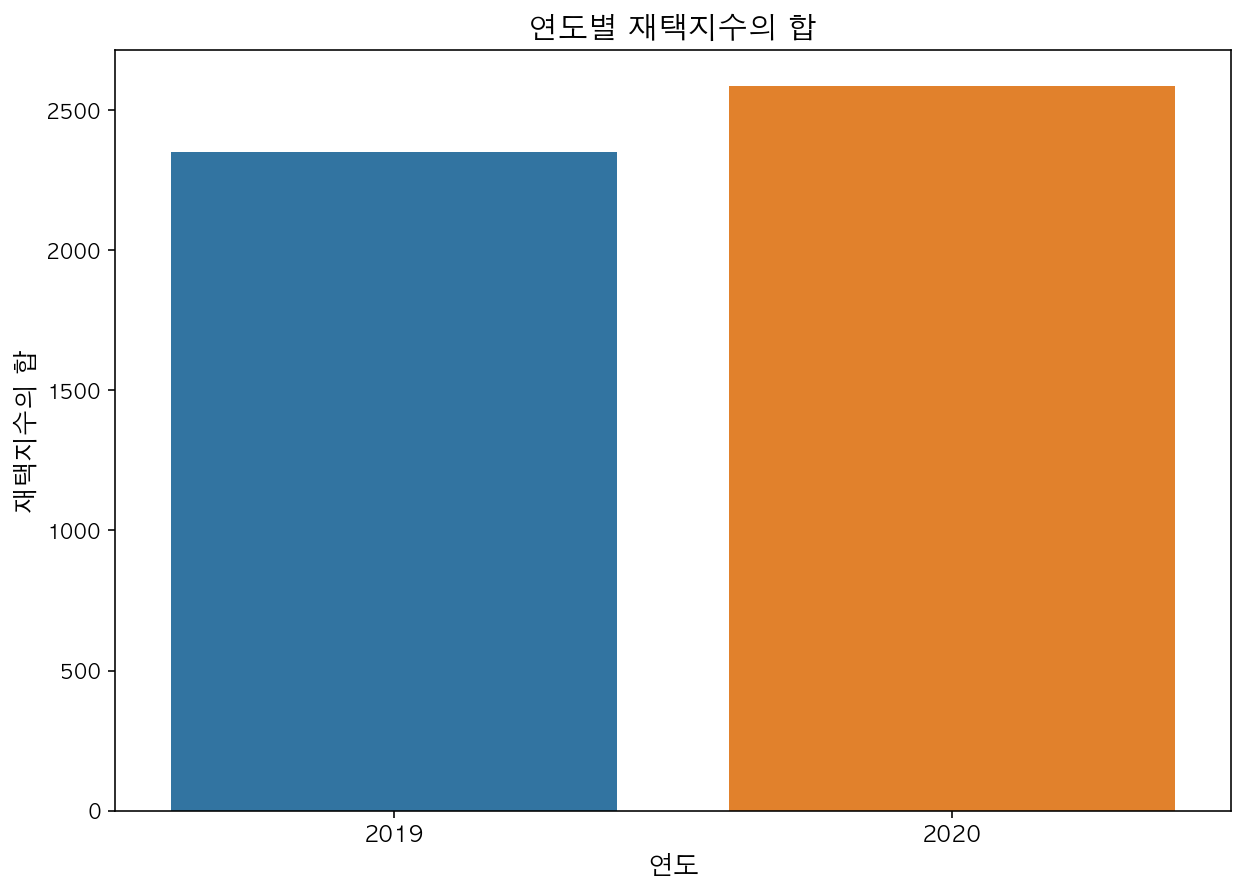

In [17]:
plt.figure(figsize = (10, 7))
sns.barplot(hidx_year.index, hidx_year.values)
plt.title('연도별 재택지수의 합', fontsize = 15)
plt.xlabel('연도', fontsize = 13)
plt.ylabel('재택지수의 합', fontsize = 13)
plt.xticks(fontsize = 11)
plt.show()

In [18]:
# 막대 그래프에 수치도 같이 나오면 좋을 것 같아서 plotly 라이브러리를 이용해봤습니다.
import plotly.express as px

fig = px.bar(x = hidx_year.index, y = hidx_year.values, text = hidx_year.values, color_continuous_scale='emrld', 
       color = hidx_year.values, labels={'x':'연도', 'y': '재택지수의 합'})

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(title_text='연도별 재택지수의 합',
                  xaxis = dict(
                    tickmode = 'linear',
                    tick0 = 1,
                    dtick = 1
                ))

## 각 연도별 월별 재택지수 비교

In [19]:
hidx

,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수,재택지수합
날짜,,,,,
2019-02-04,0.797948,0.526829,0.684447,0.554603,2.563828
2019-02-04,0.823012,0.503711,0.780915,0.620832,2.728469
2019-02-04,0.795010,0.474971,0.703548,0.584103,2.557632
2019-02-04,0.837250,0.566157,0.778773,0.629793,2.811974
2019-02-04,0.832162,0.565357,0.745649,0.616750,2.759919
...,...,...,...,...,...
2020-08-31,0.846063,0.507824,0.847899,0.704121,2.905908
2020-08-31,0.834887,0.519444,0.816935,0.699587,2.870854
2020-08-31,0.863711,0.596672,0.857551,0.734091,3.052025


In [20]:
hidx_m = hidx.groupby(lambda date: str(date.year) + '0' + str(date.month))['재택지수합'].sum()
hidx_m

201902    317.913768
201903    316.982289
201904    389.701715
201905    313.972147
201906    314.208522
201907    391.513775
201908    306.406805
202002    339.738600
202003    428.416221
202004    335.871355
202005    330.849255
202006    409.045277
202007    327.320289
202008    416.006450
Name: 재택지수합, dtype: float64

In [21]:
hidx_m.index

Index(['201902', '201903', '201904', '201905', '201906', '201907', '201908',
       '202002', '202003', '202004', '202005', '202006', '202007', '202008'],
      dtype='object')

In [22]:
hidx_m.values[:7]

array([317.913768  , 316.98228867, 389.70171538, 313.97214725,
       314.20852195, 391.5137752 , 306.40680458])

In [23]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=hidx_m.index,
    y=hidx_m.values[:7],
    name='2019년',
    marker_color='indianred',
    text = hidx_m.values[:7]
))

fig.add_trace(go.Bar(
    x=hidx_m.index,
    y=hidx_m.values[7:],
    name='2020년',
    marker_color='lightsalmon',
    text = hidx_m.values[7:]
))

fig.update_layout(barmode='group', title_text='연도별 재택지수 변화 (2월~8월)',  xaxis_title="월",
                  yaxis_title="재택지수의 합", font=dict(size=15),
                  xaxis = dict(
                        tickmode = 'array',
                        tickvals = [x for x in range(7)],
                        ticktext = [str(x) + '월' for x in range(2, 9)]
                    ))

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
                
fig.show()

# 온라인 음식 서비스 데이터

## 전국 일별 배달건수 및 배달금액(delivery.csv이용)
- 데이터 출처: ([https://dacon.io/competitions/official/235618/data/](https://dacon.io/competitions/official/235618/data/))

### 데이터 가져오고 정제

In [24]:
delivery = pd.read_csv('./delivery.csv', usecols = ['PROCESS_DT','DLVR_REQUST_STTUS_VALUE','GOODS_AMOUNT'])
delivery.head()

,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,GOODS_AMOUNT
0,2020-01-01,1,25000
1,2020-01-01,1,49000
2,2020-01-01,1,23000
3,2020-01-01,1,20000
4,2020-01-01,1,32000


In [25]:
delivery.columns = ['날짜', '배달성공여부', '배달상품금액']

In [26]:
# 배달 완료한 데이터만 가져옴
delivery = delivery[delivery['배달성공여부'] == 1]
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5075760 entries, 0 to 5158323
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   날짜      object
 1   배달성공여부  int64 
 2   배달상품금액  int64 
dtypes: int64(2), object(1)
memory usage: 154.9+ MB


In [27]:
delivery.isnull().sum() # 결측치 개수 확인

날짜        0
배달성공여부    0
배달상품금액    0
dtype: int64

In [28]:
delivery['날짜2'] = pd.to_datetime(delivery['날짜'])

In [29]:
delivery.head()

,날짜,배달성공여부,배달상품금액,날짜2
0,2020-01-01,1,25000,2020-01-01
1,2020-01-01,1,49000,2020-01-01
2,2020-01-01,1,23000,2020-01-01
3,2020-01-01,1,20000,2020-01-01
4,2020-01-01,1,32000,2020-01-01


### 배달 횟수, 배달 상품 금액 시각화

- matplotlib.dates에 관한 설명 : https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.date2num

In [30]:
from matplotlib.dates import date2num
import matplotlib.dates as dates

delivery['날짜3'] = date2num(delivery['날짜2'])
# date2num : datetime 데이터를 matplotlib 데이터로 변경해줌

In [31]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5075760 entries, 0 to 5158323
Data columns (total 5 columns):
 #   Column  Dtype         
---  ------  -----         
 0   날짜      object        
 1   배달성공여부  int64         
 2   배달상품금액  int64         
 3   날짜2     datetime64[ns]
 4   날짜3     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 232.3+ MB


In [32]:
delivery.head()

,날짜,배달성공여부,배달상품금액,날짜2,날짜3
0,2020-01-01,1,25000,2020-01-01,18262.0
1,2020-01-01,1,49000,2020-01-01,18262.0
2,2020-01-01,1,23000,2020-01-01,18262.0
3,2020-01-01,1,20000,2020-01-01,18262.0
4,2020-01-01,1,32000,2020-01-01,18262.0


In [33]:
deli_a = delivery.groupby('날짜3')['배달상품금액'].mean()
deli_a

날짜3
18262.0    23812.775612
18263.0    22789.959667
18264.0    23025.555686
18265.0    23472.221922
18266.0    23052.449523
               ...     
18423.0    23386.702186
18424.0    23100.579892
18425.0    23844.691251
18433.0    24227.593798
18434.0    23678.270565
Name: 배달상품금액, Length: 165, dtype: float64

In [34]:
deli_c = delivery.groupby('날짜3')['배달성공여부'].count()
deli_c

날짜3
18262.0    30064
18263.0    21496
18264.0    25536
18265.0    29569
18266.0    30717
           ...  
18423.0    33306
18424.0    30854
18425.0    35728
18433.0    41376
18434.0    43509
Name: 배달성공여부, Length: 165, dtype: int64

- 코드 참고한 사이트 : https://dacon.io/competitions/official/235618/codeshare/1399

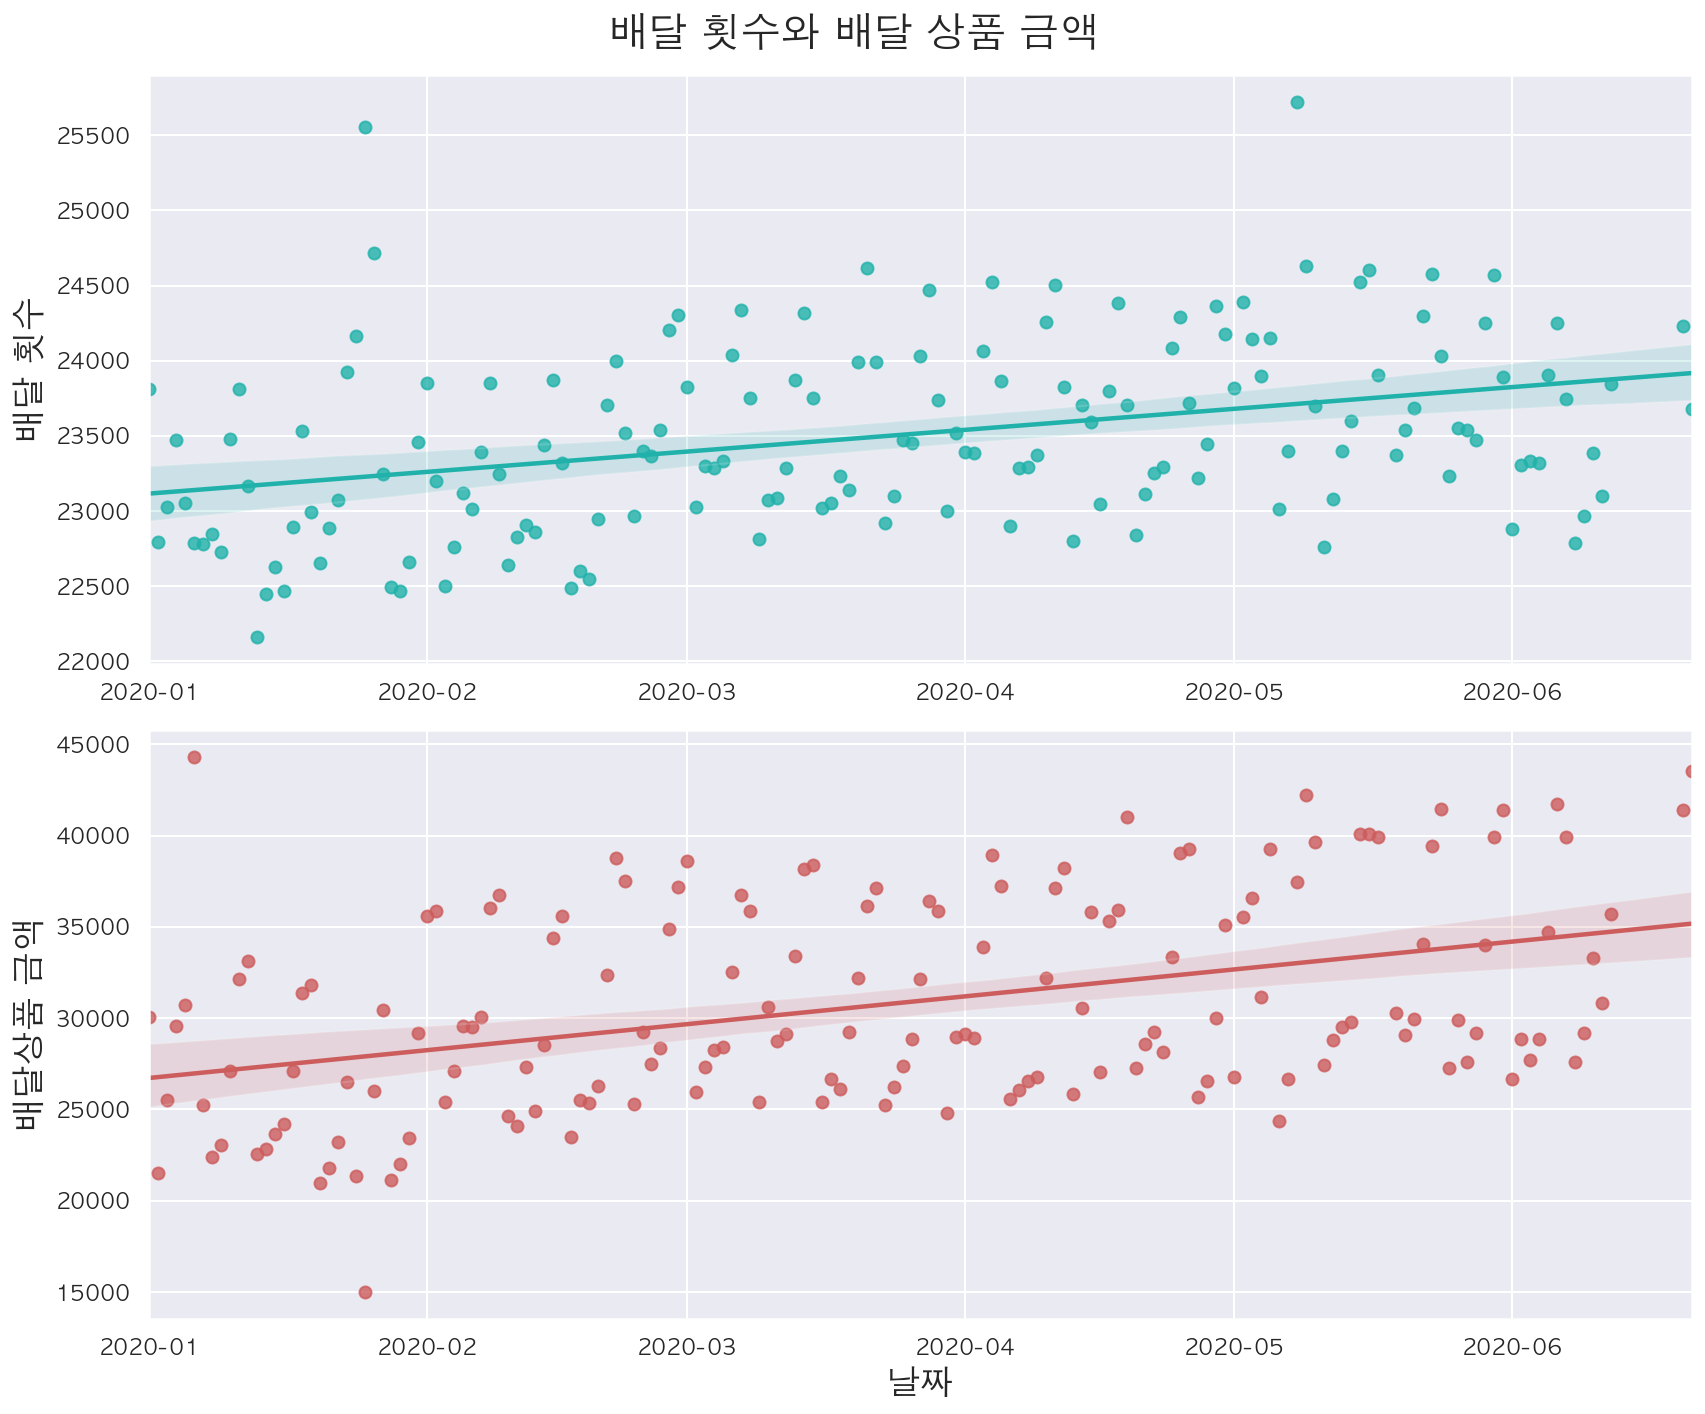

In [35]:
sns.set(style='darkgrid', font = fontname)
fig = plt.figure(figsize = (12, 10))
fig.suptitle('배달 횟수와 배달 상품 금액', fontsize = 20)

# 배달 횟수 변화 그래프 
plt.subplot(2, 1, 1)
ax1 = sns.regplot(deli_a.index, deli_a.values, color = 'lightseagreen')
loc = dates.AutoDateLocator() # x축에 맞는 날짜를 자동으로 세팅?
ax1.xaxis.set_major_locator(loc) # 세팅한 값에 맞춰 'x축' 정해줌
ax1.xaxis.set_major_formatter(dates.AutoDateFormatter(loc)) # 세팅된 값에 맞춘 'x축 라벨'지정
plt.ylabel('배달 횟수', fontsize = 17)
ax1.xaxis.label.set_visible(False)

# 배달 상품 금액 변화 그래프 
plt.subplot(2, 1, 2)
ax2 = sns.regplot(deli_c.index, deli_c.values, color = 'indianred')
loc = dates.AutoDateLocator() 
ax2.xaxis.set_major_locator(loc) 
ax2.xaxis.set_major_formatter(dates.AutoDateFormatter(loc))
plt.xlabel('날짜', fontsize = 17)
plt.ylabel('배달상품 금액', fontsize = 17)

plt.tight_layout()

- 위 코드와 비교해보기 (AutoDateLocator -> MonthLocator)

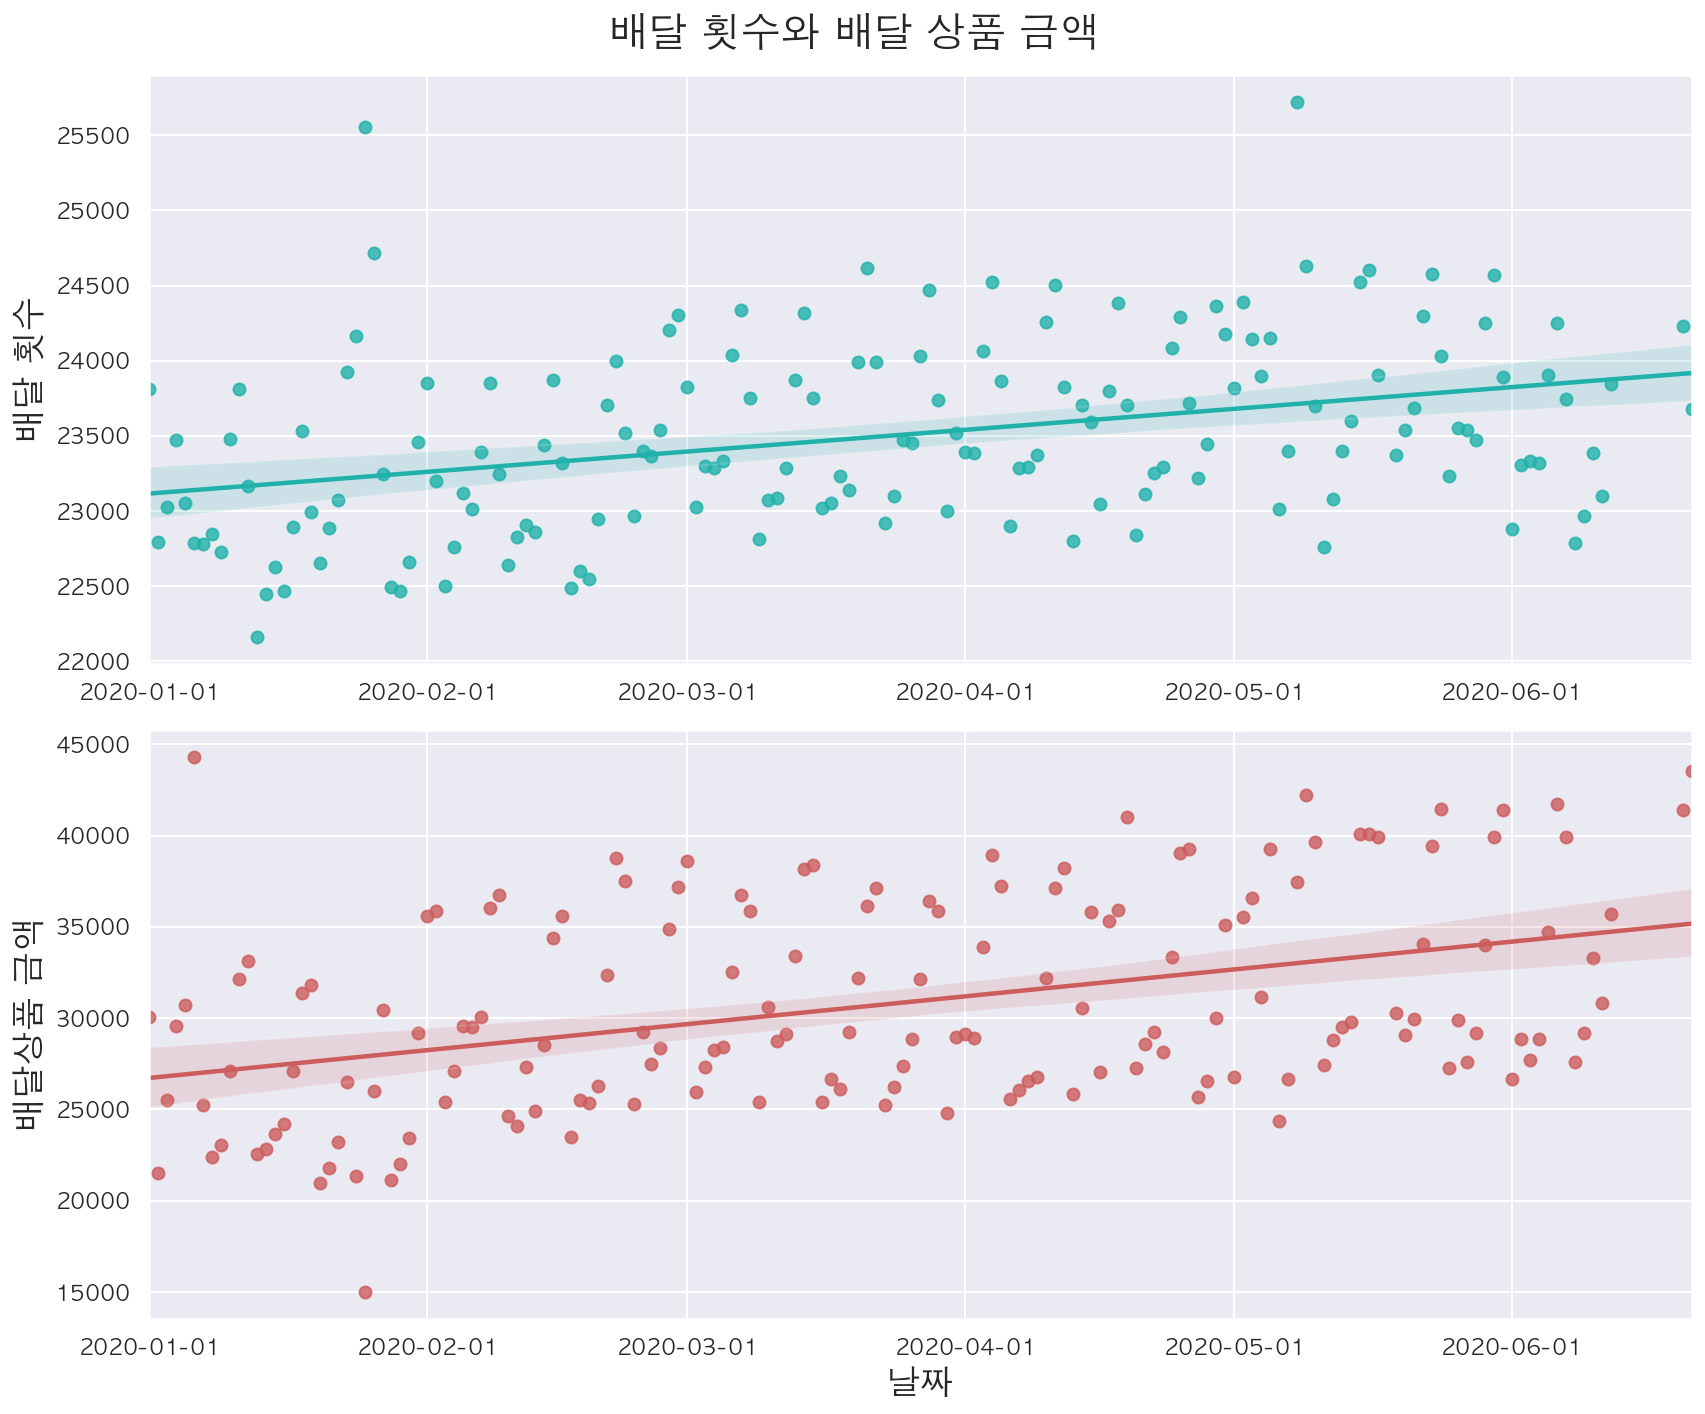

In [36]:
sns.set(style='darkgrid', font = fontname)
fig = plt.figure(figsize = (12, 10))
fig.suptitle('배달 횟수와 배달 상품 금액', fontsize = 20)

# 배달 횟수 변화 그래프 
plt.subplot(2, 1, 1)
ax1 = sns.regplot(deli_a.index, deli_a.values, color = 'lightseagreen')
a = ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.AutoDateFormatter(a))
plt.ylabel('배달 횟수', fontsize = 17)
ax1.xaxis.label.set_visible(False)

# 배달 상품 금액 변화 그래프 
plt.subplot(2, 1, 2)
ax2 = sns.regplot(deli_c.index, deli_c.values, color = 'indianred')
b = ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.AutoDateFormatter(b))
plt.xlabel('날짜', fontsize = 17)
plt.ylabel('배달상품 금액', fontsize = 17)

plt.tight_layout()

# MonthLocator 사용하니 x축에 일자까지 같이 나옴